In [ ]:
import pandas as pd
import numpy as npg
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#load the data and review
building_stats = pd.read_csv('/content/drive/My Drive/Colab Data/building_stats.csv')
building_stats.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TaxParcel,GrossAreasqft,PropertyName,PropertyType,PropertyUses,YearBuilt,data_from
0,502640000,55220,NaN,APT 7-30 UNITS,NaN,NaN,2021
1,2201177000,46686,NaN,"CHURCH, SYNAGOGUE",NaN,NaN,2021
2,402222010,123120,NaN,COLLEGE,NaN,NaN,2021
3,2102478000,48655,NaN,CONDO MAIN,NaN,NaN,2021
4,1103322000,20854,NaN,CONDO MAIN,NaN,NaN,2021


In [ ]:
building_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TaxParcel      3609 non-null   object 
 1   GrossAreasqft  3575 non-null   object 
 2   PropertyName   2978 non-null   object 
 3   PropertyType   3606 non-null   object 
 4   PropertyUses   2966 non-null   object 
 5   YearBuilt      2978 non-null   float64
 6   data_from      3609 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 197.5+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# load the data and review
energy_water_metrics = pd.read_csv('/content/drive/My Drive/Colab Data/reported_energy_and_water_metrics.csv')
energy_water_metrics.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ReportYear,BERDOID,TaxParcelID,PropertyOwnerName,BuildingAddress,BuildingAddressCity,BuildingAddressZipCode,ParcelAddress,ParcelAddressCity,ParcelAddressZipCode,...,BERDOReportStatus,EstimatedTotalGHGEmissionskgCO2e,CommunityChoiceElectricityParticipation,RenewableEnergyPurchasedthroughaPowerPurchaseAgreementPPA,RenewableEnergyCertificateRECPurchase,BackupGenerator,BatteryStorage,ElectricVehicleEVCharging,CoorespondingCampusID,Notes
0,2023,"105097, 105098, 105099, 105100, 105101, 105102...",1.102640e+09,NaN,"461, 463, 467, 469, 493, 495 Arborway,",boston,2130.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4331167.0,This is a campus comprised of multiple buildin...
1,2023,"105779, 105781, 105782, 105783",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6349839.0,This is a campus comprised of multiple buildin...
2,2023,"106715, 107102, 107103, 107104, 107105",NaN,NaN,550 Parker St.,boston,2120.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23642154.0,This is a campus comprised of multiple buildin...
3,2023,"102580, 102581, 102582",1.806659e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25074587.0,This is a campus comprised of multiple buildin...
4,2023,"101822, 107009",NaN,NaN,312 Border St.,boston,2128.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4028273.0,This is a campus comprised of multiple buildin...


In [ ]:
energy_water_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5981 entries, 0 to 5980
Data columns (total 42 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ReportYear                                                 5981 non-null   int64  
 1   BERDOID                                                    5980 non-null   object 
 2   TaxParcelID                                                5933 non-null   float64
 3   PropertyOwnerName                                          5912 non-null   object 
 4   BuildingAddress                                            5956 non-null   object 
 5   BuildingAddressCity                                        5961 non-null   object 
 6   BuildingAddressZipCode                                     5957 non-null   float64
 7   ParcelAddress                                              5897 non-null   object 
 8   ParcelAd

In [ ]:
# Clean the TaxParcel column in building_stats by stripping whitespace and converting to string
building_stats['TaxParcel'] = building_stats['TaxParcel'].astype(str).str.strip()

# Convert TaxParcelID in energy_water_metrics to string, handling both float and string cases
def convert_to_string(value):
    try:
        # Try to convert float values to int, then to string to remove decimal points
        return str(int(float(value)))
    except (ValueError, TypeError):
        # If conversion fails, return an empty string for null or invalid values
        return ''

energy_water_metrics['TaxParcelID'] = energy_water_metrics['TaxParcelID'].apply(convert_to_string)

# Check for overlapping values between TaxParcel and TaxParcelID
overlapping_values = set(building_stats['TaxParcel']).intersection(set(energy_water_metrics['TaxParcelID']))
print(f'Number of overlapping values: {len(overlapping_values)}')

# Merge the datasets on the common column (TaxParcel and TaxParcelID) after cleaning
merged_data = pd.merge(building_stats, energy_water_metrics, left_on='TaxParcel', right_on='TaxParcelID', how='inner')

# Optionally save the merged dataset to a new CSV file
merged_data.to_csv('merged_building_energy_data.csv', index=False)
merged_data.info()

Number of overlapping values: 2185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4879 entries, 0 to 4878
Data columns (total 49 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   TaxParcel                                                  4879 non-null   object 
 1   GrossAreasqft                                              4857 non-null   object 
 2   PropertyName                                               4141 non-null   object 
 3   PropertyType                                               4877 non-null   object 
 4   PropertyUses                                               4141 non-null   object 
 5   YearBuilt                                                  4141 non-null   float64
 6   data_from                                                  4879 non-null   int64  
 7   ReportYear                                                 48

In [ ]:
merged_data.head()

,TaxParcel,GrossAreasqft,PropertyName,PropertyType,PropertyUses,YearBuilt,data_from,ReportYear,BERDOID,TaxParcelID,...,BERDOReportStatus,EstimatedTotalGHGEmissionskgCO2e,CommunityChoiceElectricityParticipation,RenewableEnergyPurchasedthroughaPowerPurchaseAgreementPPA,RenewableEnergyCertificateRECPurchase,BackupGenerator,BatteryStorage,ElectricVehicleEVCharging,CoorespondingCampusID,Notes
0,502640000,55220,NaN,APT 7-30 UNITS,NaN,NaN,2021,2023,106400,502640000,...,0 - Not Claimed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2201177000,46686,NaN,"CHURCH, SYNAGOGUE",NaN,NaN,2021,2023,105392,2201177000,...,1 - No Data Reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,402222010,123120,NaN,COLLEGE,NaN,NaN,2021,2023,104732,402222010,...,7 - Accepted by BERDO Team,NaN,No,No,No,Yes,No,No,4021806.0,This building has been reported as part of a c...
3,402222010,123120,NaN,COLLEGE,NaN,NaN,2021,2023,104740,402222010,...,7 - Accepted by BERDO Team,NaN,No,No,No,Yes,No,No,4021806.0,This building has been reported as part of a c...
4,402222010,123120,NaN,COLLEGE,NaN,NaN,2021,2023,104733,402222010,...,7 - Accepted by BERDO Team,NaN,No,No,No,Yes,No,No,4021806.0,This building has been reported as part of a c...


In [ ]:
# Drop rows with missing values in critical columns
merged_data = merged_data.dropna(subset=['TaxParcel', 'TaxParcelID', 'PropertyType'])

# Drop columns with more than 70% missing values
merged_data = merged_data.loc[:, merged_data.isnull().mean() < 0.7]

# Convert numerical columns that may be stored as strings to numeric types
numerical_columns = ['GrossAreasqft', 'ElectricityUsagekBtu', 'TotalSiteEnergyUsagekBtu']

for column in numerical_columns:
    # Convert to numeric, forcing errors to NaN if conversion fails
    merged_data[column] = pd.to_numeric(merged_data[column], errors='coerce')
    # Impute missing values with the median of the column
    merged_data[column].fillna(merged_data[column].median(), inplace=True)

# Impute categorical columns with the most common value (mode)
for column in ['PropertyType', 'BERDOReportStatus', 'CommunityChoiceElectricityParticipation']:
    merged_data[column].fillna(merged_data[column].mode()[0], inplace=True)

# Label missing categorical data as 'Unknown'
merged_data['RenewableEnergyCertificateRECPurchase'].fillna('Unknown', inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4877 entries, 0 to 4878
Data columns (total 35 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   TaxParcel                                                  4877 non-null   object 
 1   GrossAreasqft                                              4877 non-null   float64
 2   PropertyName                                               4141 non-null   object 
 3   PropertyType                                               4877 non-null   object 
 4   PropertyUses                                               4141 non-null   object 
 5   YearBuilt                                                  4141 non-null   float64
 6   data_from                                                  4877 non-null   int64  
 7   ReportYear                                                 4877 non-null   int64  
 8   BERDOID      

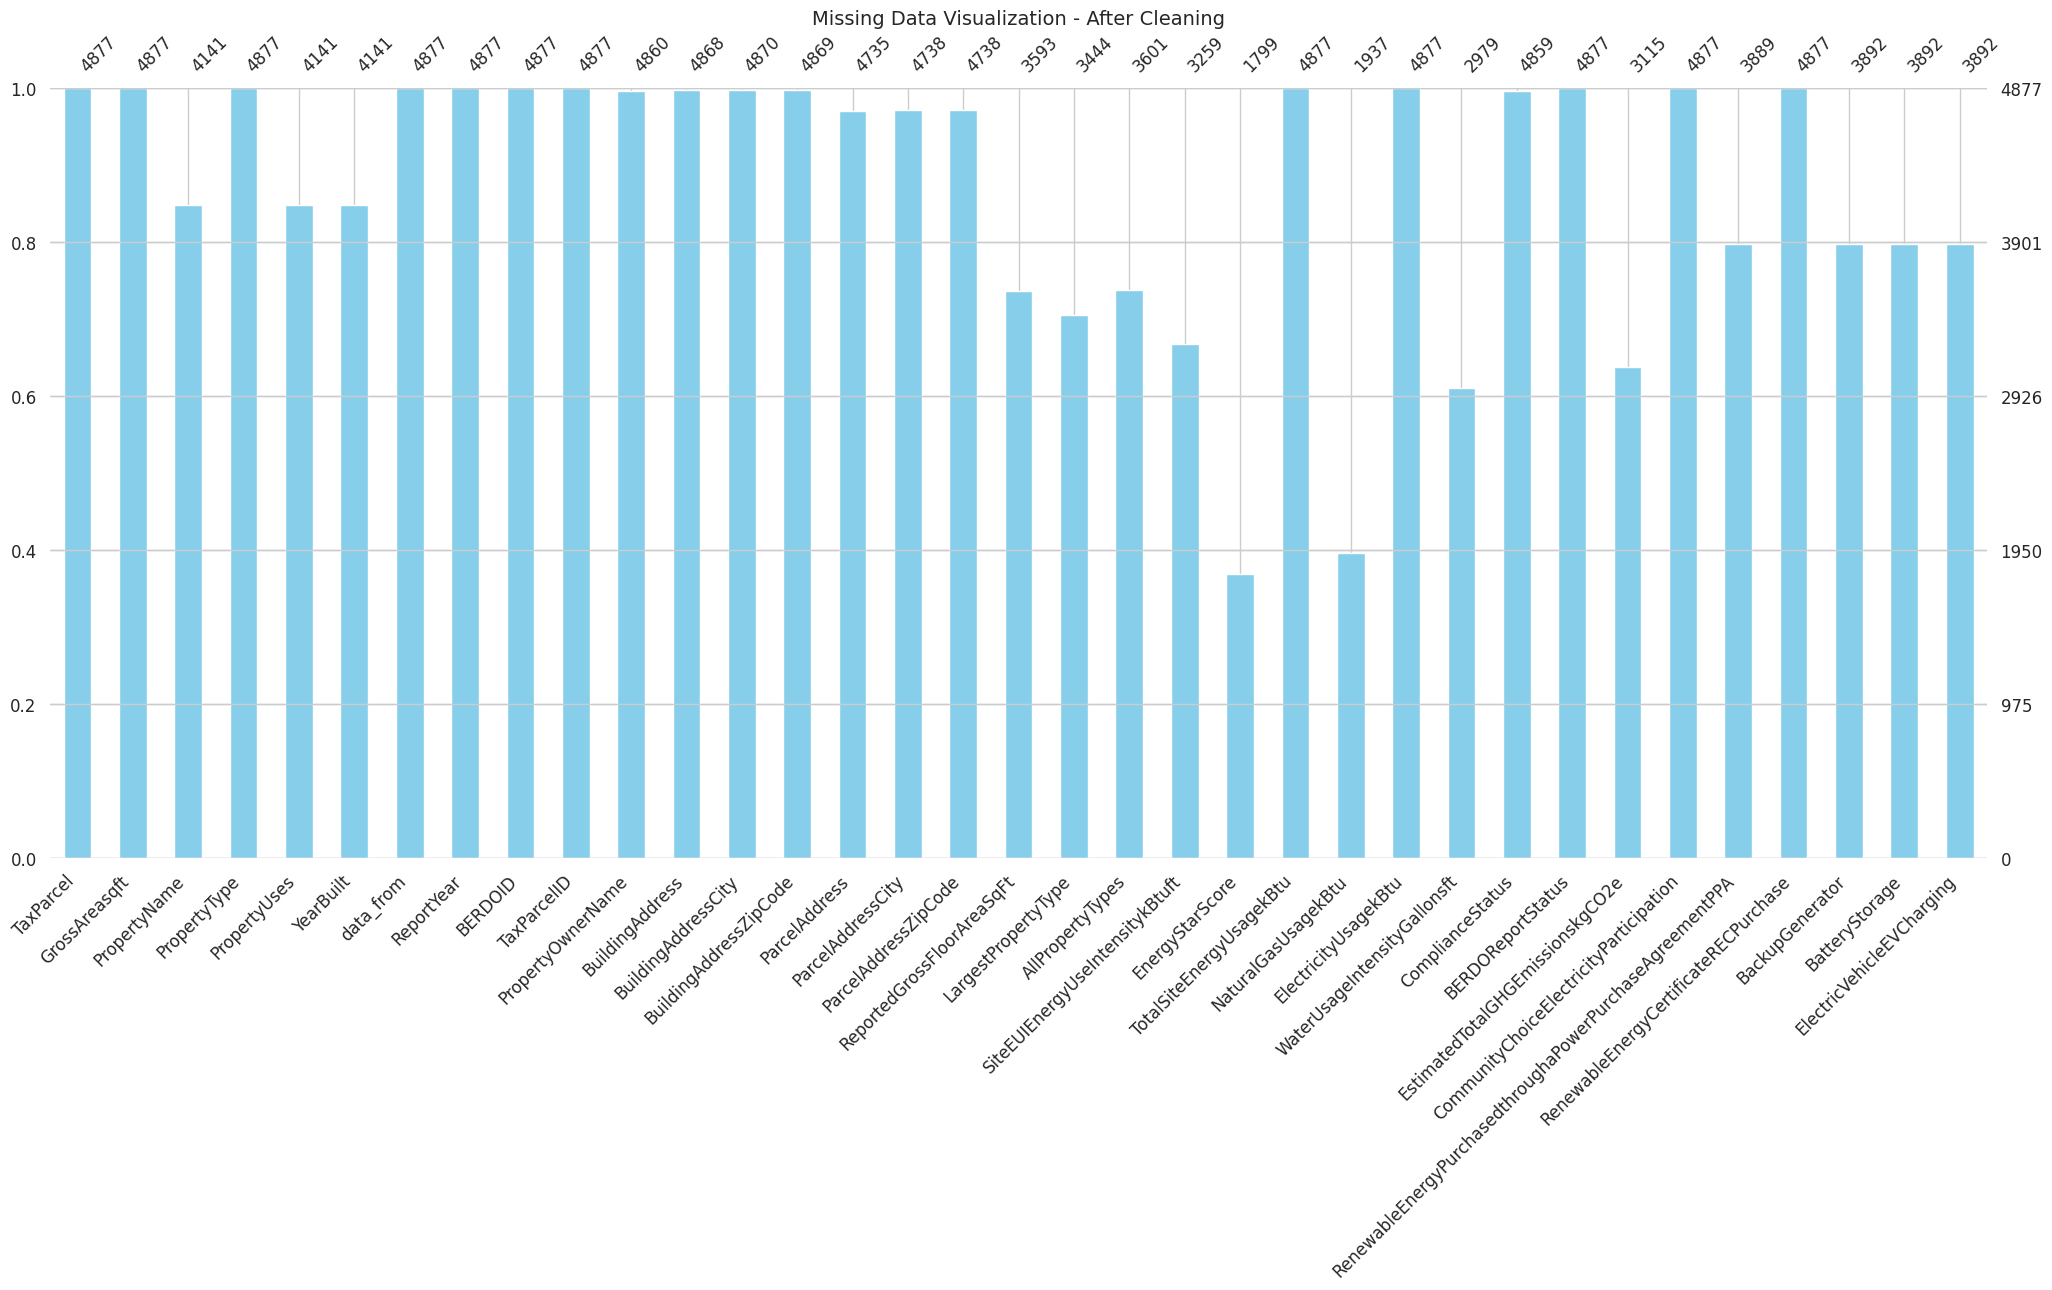

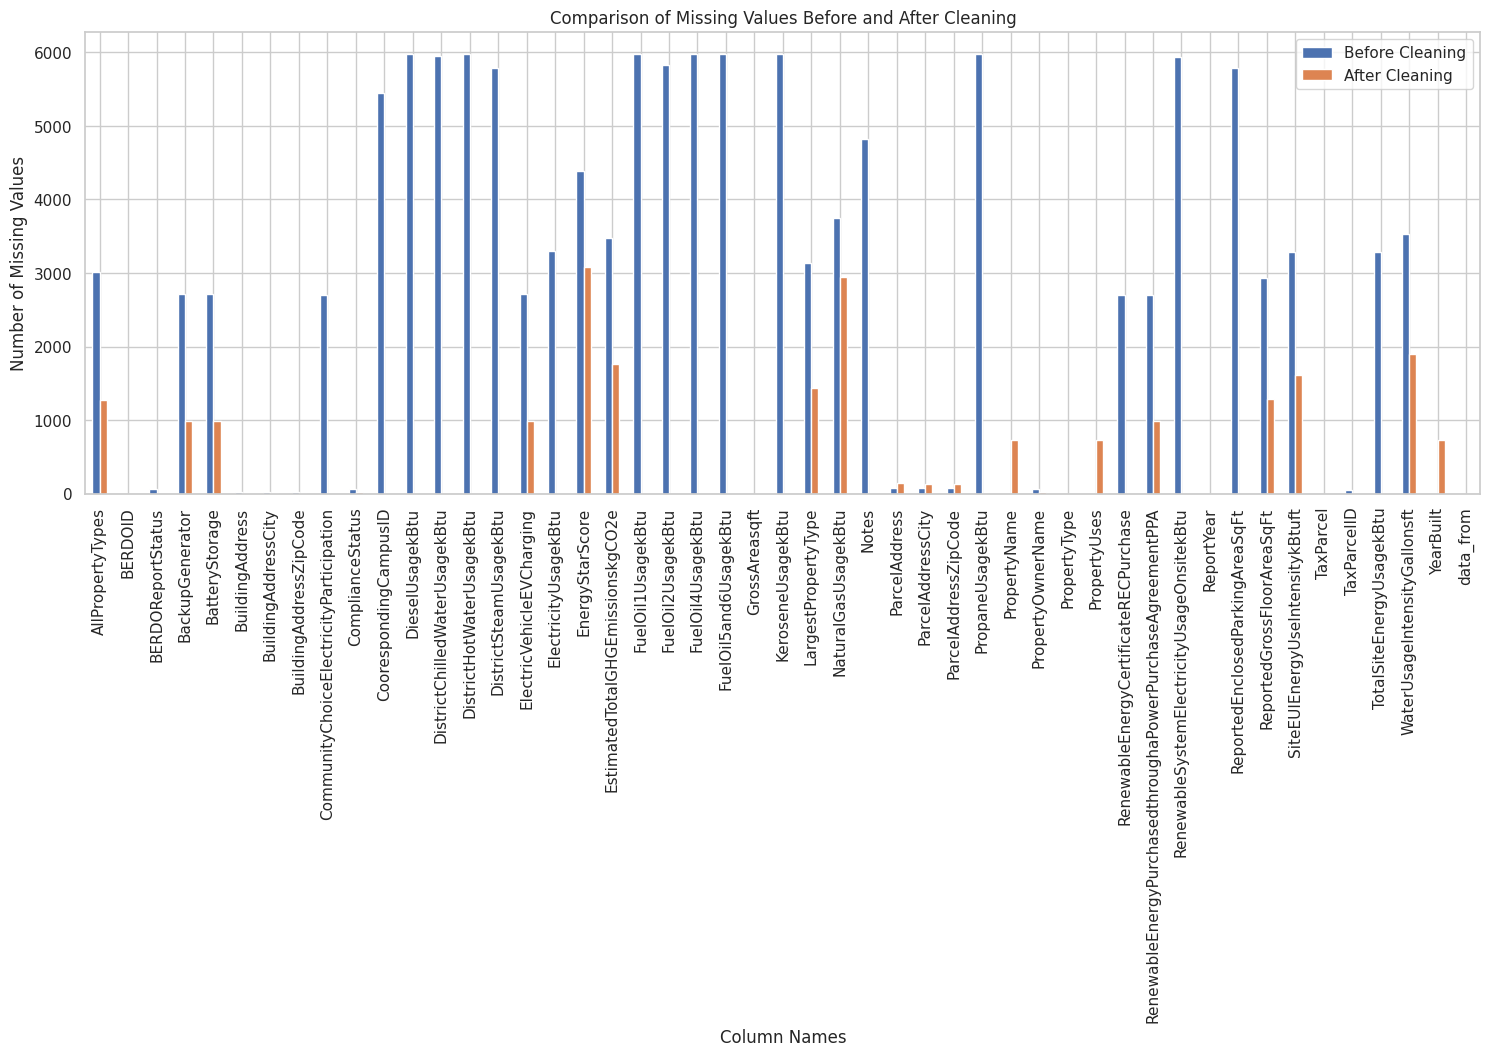

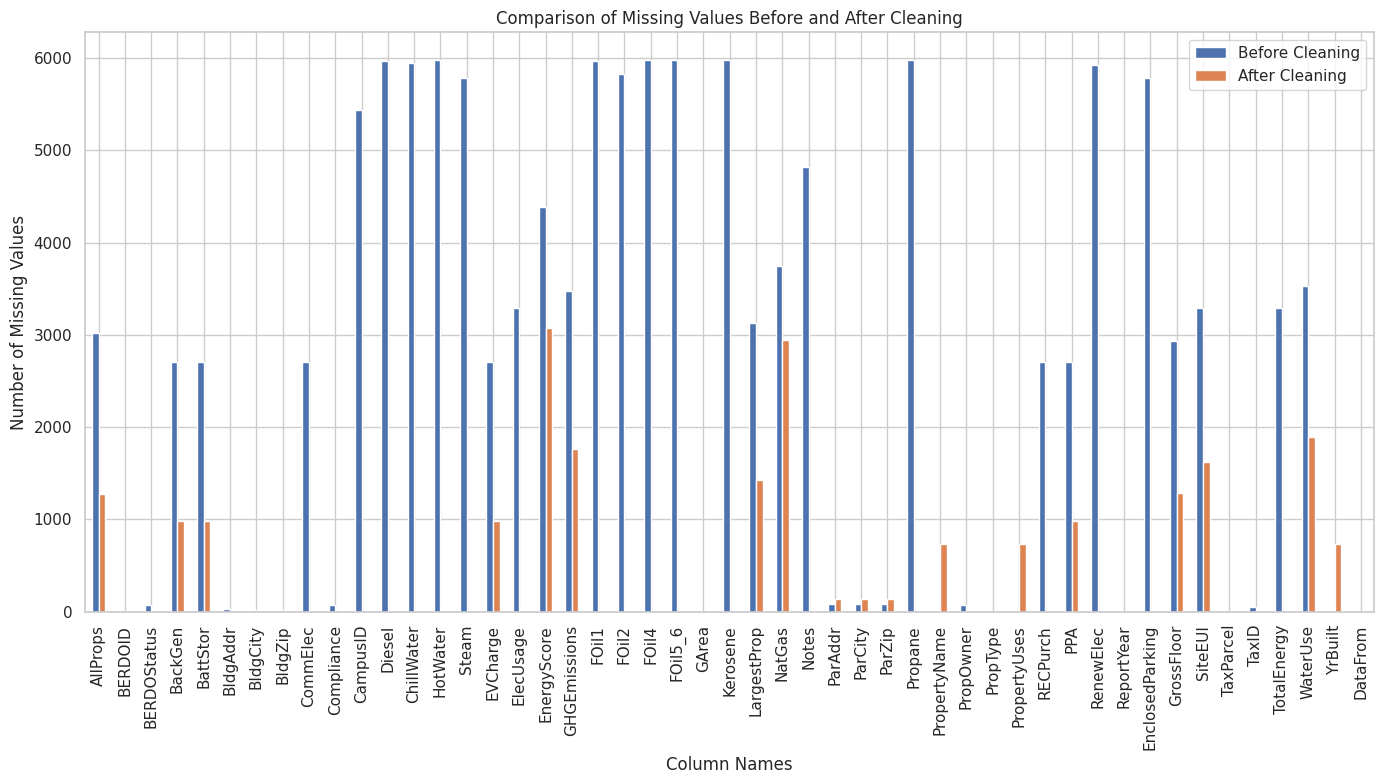

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Visualization 1: Missing Data Bar Chart Before Cleaning
plt.figure(figsize=(12, 6))
msno.bar(merged_data, color='skyblue', fontsize=12)
plt.title('Missing Data Visualization - After Cleaning', fontsize=14)
plt.show()

# Visualization 2: Comparison of Missing Values Before and After Cleaning

# Assuming you have the original dataset stored in `original_data`
original_data =  pd.read_csv('/content/drive/My Drive/Colab Data/reported_energy_and_water_metrics.csv')  # Load original data before cleaning
before_missing = original_data.isnull().sum()
after_missing = merged_data.isnull().sum()

missing_comparison = pd.DataFrame({
    'Before Cleaning': before_missing,
    'After Cleaning': after_missing,
})

# Plot the missing values
missing_comparison.plot(kind='bar', figsize=(18, 6))
plt.title('Comparison of Missing Values Before and After Cleaning')
plt.xlabel('Column Names')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
# Create a dictionary to map long column names to their abbreviated versions
column_name_map = {
    'AllPropertyTypes': 'AllProps',
    'BERDOReportStatus': 'BERDOStatus',
    'BackupGenerator': 'BackGen',
    'BatteryStorage': 'BattStor',
    'BuildingAddress': 'BldgAddr',
    'BuildingAddressCity': 'BldgCity',
    'BuildingAddressZipCode': 'BldgZip',
    'CommunityChoiceElectricityParticipation': 'CommElec',
    'CoorespondingCampusID': 'CampusID',
    'DieselUsagekBtu': 'Diesel',
    'DistrictChilledWaterUsagekBtu': 'ChillWater',
    'DistrictHotWaterUsagekBtu': 'HotWater',
    'DistrictSteamUsagekBtu': 'Steam',
    'ElectricVehicleEVCharging': 'EVCharge',
    'ElectricityUsagekBtu': 'ElecUsage',
    'EnergyStarScore': 'EnergyScore',
    'EstimatedTotalGHGEmissionskgCO2e': 'GHGEmissions',
    'FuelOil1UsagekBtu': 'FOil1',
    'FuelOil2UsagekBtu': 'FOil2',
    'FuelOil4UsagekBtu': 'FOil4',
    'FuelOil5and6UsagekBtu': 'FOil5_6',
    'GrossAreasqft': 'GArea',
    'KeroseneUsagekBtu': 'Kerosene',
    'LargestPropertyType': 'LargestProp',
    'NaturalGasUsagekBtu': 'NatGas',
    'ParcelAddress': 'ParAddr',
    'ParcelAddressCity': 'ParCity',
    'ParcelAddressZipCode': 'ParZip',
    'PropaneUsagekBtu': 'Propane',
    'PropertyOwnerName': 'PropOwner',
    'PropertyType': 'PropType',
    'RenewableEnergyCertificateRECPurchase': 'RECPurch',
    'RenewableEnergyPurchasedthroughaPowerPurchaseAgreementPPA': 'PPA',
    'ReportedGrossFloorAreaSqFt': 'GrossFloor',
    'ReportedEnclosedParkingAreaSqFt': 'EnclosedParking',
    'ReportedOpenParkingAreaSqFt': 'OpenParking',
    'SiteEUIEnergyUseIntensitykBtuft': 'SiteEUI',
    'TaxParcel': 'TaxParcel',
    'TaxParcelID': 'TaxID',
    'TotalSiteEnergyUsagekBtu': 'TotalEnergy',
    'WaterUsageIntensityGallonsft': 'WaterUse',
    'YearBuilt': 'YrBuilt',
    'data_from': 'DataFrom',
    'ComplianceStatus': 'Compliance',
    'RenewableSystemElectricityUsageOnsitekBtu': 'RenewElec'
}

# Rename the columns in the missing_comparison DataFrame for the plot
missing_comparison.rename(index=column_name_map, inplace=True)

# Plot the missing values with shortened column names
missing_comparison.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Missing Values Before and After Cleaning')
plt.xlabel('Column Names')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()